In [22]:
#Import the basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

sns.set_style("white")
sns.color_palette('Set2')
sns.set_context({"figure.figsize": (18, 5)})

# remove warnings
import warnings
warnings.filterwarnings("ignore",category=plt.cbook.mplDeprecation)
warnings.filterwarnings("ignore",category=FutureWarning)



### Helper Functions

In [389]:
def print_categorical_indexes(df):
    print("================================================")
    print(f"Categorical Unique Values")
    
    dtypes = df.dtypes

    for index in dtypes.index:
        if dtypes[index] == 'object':
            print("----------------------------------------")
            print(f"{index}")
            print(df[index].unique())
            print("")
            print("")
            
            
def barplot_by_countries(df, x, h, w, t='', l=''):
    
    fig, axes = plt.subplots(1, 1, sharex=False, figsize=(18,6))
    sns.histplot(data=df, axes = axes, x=x, hue=h, weights=w, multiple='stack', shrink=0.8)
    
    axes.set_title(t)
    axes.set_ylabel(l)
    #legend = axes.get_legend()
    #legend.set_bbox_to_anchor((1, 1))

    plt.show()

### Global

In [390]:
years_list = list(range(2010, 2020))
countries_list = ['Poland', 'Portugal', 'France', 'Spain', 'Germany', 'Switzerland' 'United Kingdom', 
                  'Ireland', 'Sweden', 'Finland', 'Denmark', 'Netherlands', 'Hungary', 'Croatia', 
                  'Greece', 'Romania', 'Austria' 'Iceland', 'Italy', 'Belgium'
                 ]

### Diseases

#### Load and Explore

In [391]:
df_diseases_raw = pd.read_csv('../raw data/Diseases_GHDx/IHME-GBD_2019_DATA-571888e5-1.csv')
df_diseases_raw.head()

,measure_id,measure_name,location_id,location_name,sex_id,sex_name,age_id,age_name,cause_id,cause_name,metric_id,metric_name,year,val,upper,lower
0,6,Incidence,37,Kyrgyzstan,1,Male,22,All Ages,972,Headache disorders,1,Number,2000,284784.143493,320214.245491,248249.750099
1,6,Incidence,37,Kyrgyzstan,2,Female,22,All Ages,972,Headache disorders,1,Number,2000,318105.445247,355938.066073,279634.680100
2,6,Incidence,37,Kyrgyzstan,3,Both,22,All Ages,972,Headache disorders,1,Number,2000,602889.588740,674753.218721,528186.360431
3,6,Incidence,37,Kyrgyzstan,1,Male,22,All Ages,972,Headache disorders,2,Percent,2000,0.028188,0.032116,0.024244
4,6,Incidence,37,Kyrgyzstan,2,Female,22,All Ages,972,Headache disorders,2,Percent,2000,0.030881,0.034716,0.026976


In [392]:
print(df_diseases_raw.columns)
df_diseases_raw.info()

Index(['measure_id', 'measure_name', 'location_id', 'location_name', 'sex_id',
       'sex_name', 'age_id', 'age_name', 'cause_id', 'cause_name', 'metric_id',
       'metric_name', 'year', 'val', 'upper', 'lower'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168120 entries, 0 to 168119
Data columns (total 16 columns):
measure_id       168120 non-null int64
measure_name     168120 non-null object
location_id      168120 non-null int64
location_name    168120 non-null object
sex_id           168120 non-null int64
sex_name         168120 non-null object
age_id           168120 non-null int64
age_name         168120 non-null object
cause_id         168120 non-null int64
cause_name       168120 non-null object
metric_id        168120 non-null int64
metric_name      168120 non-null object
year             168120 non-null int64
val              168120 non-null float64
upper            168120 non-null float64
lower            168120 non-null float64
dtypes: float64(

In [393]:
#  Categorical
print_categorical_indexes(df_diseases_raw)

# Year
print(df_diseases_raw["year"].unique())


Categorical Unique Values
----------------------------------------
measure_name
['Incidence']


----------------------------------------
location_name
['Kyrgyzstan' 'Brazil' 'Uzbekistan' 'China' 'Mauritius' 'Tajikistan'
 'Turkmenistan' 'Chile' 'Democratic Republic of the Congo' 'Andorra'
 'Albania' 'Taiwan (Province of China)' 'Nauru' 'South Africa'
 "Democratic People's Republic of Korea" 'Mongolia' 'Eswatini' 'Malaysia'
 'Bosnia and Herzegovina' 'Zimbabwe' 'American Samoa' 'Bulgaria'
 'Cambodia' 'Indonesia' 'Croatia' 'Benin' 'Burkina Faso' 'Guinea-Bissau'
 "Lao People's Democratic Republic" 'Czechia' 'Cameroon' 'Dominica'
 'Cabo Verde' 'Hungary' 'Russian Federation' 'Ukraine' 'Chad'
 'North Macedonia' 'Timor-Leste' 'Pakistan' 'Afghanistan' "Côte d'Ivoire"
 'Micronesia (Federated States of)' 'Djibouti' 'Sudan' 'Papua New Guinea'
 'Gambia' 'Sao Tome and Principe' 'Japan' 'France' 'Armenia' 'Samoa'
 'Ghana' 'Mozambique' 'Stockholm' 'Montenegro' 'Solomon Islands' 'Guinea'
 'Saint Lucia' 

In [394]:
df_diseases_raw.head()

,measure_id,measure_name,location_id,location_name,sex_id,sex_name,age_id,age_name,cause_id,cause_name,metric_id,metric_name,year,val,upper,lower
0,6,Incidence,37,Kyrgyzstan,1,Male,22,All Ages,972,Headache disorders,1,Number,2000,284784.143493,320214.245491,248249.750099
1,6,Incidence,37,Kyrgyzstan,2,Female,22,All Ages,972,Headache disorders,1,Number,2000,318105.445247,355938.066073,279634.680100
2,6,Incidence,37,Kyrgyzstan,3,Both,22,All Ages,972,Headache disorders,1,Number,2000,602889.588740,674753.218721,528186.360431
3,6,Incidence,37,Kyrgyzstan,1,Male,22,All Ages,972,Headache disorders,2,Percent,2000,0.028188,0.032116,0.024244
4,6,Incidence,37,Kyrgyzstan,2,Female,22,All Ages,972,Headache disorders,2,Percent,2000,0.030881,0.034716,0.026976


#### Clean 

- Subset
- Keep only Male and Female
- Keep only by number and val
- remove val decimals

In [395]:
def process_deseases(df, countries_list, years_list):
    
    columns_to_keep = ['location_name', 'sex_name', 'cause_name', 'metric_name', 'year', 'val']

    _df = df[(df["year"].isin(years_list))][columns_to_keep]
    _df = _df[_df["location_name"].isin(countries_list)]
    
    #_df = _df[(_df["sex_name"].isin(['Male', 'Female'])) & (_df["metric_name"] == 'Number')]
    _df = _df[(_df["sex_name"].isin(['Both'])) & (_df["metric_name"] == 'Number')]
    _df['val'] = _df['val'].map(round)
    
    return (_df
            .rename(columns = {'val': 'diseases_val', 'cause_name': 'diseases_cause_name'})
            [['location_name', 'diseases_cause_name', 'diseases_val', 'year' ]]
           )

df_diseases = process_deseases(df_diseases_raw, countries_list,  years_list)
print(df_diseases.columns)
df_diseases.head()

Index(['location_name', 'diseases_cause_name', 'diseases_val', 'year'], dtype='object')


,location_name,diseases_cause_name,diseases_val,year
58176,Poland,Musculoskeletal disorders,2459777,2010
58212,Romania,Depressive disorders,641575,2010
58218,Romania,Bipolar disorder,10640,2010
58224,Romania,Anxiety disorders,103911,2010
58781,Belgium,Dermatitis,350210,2010


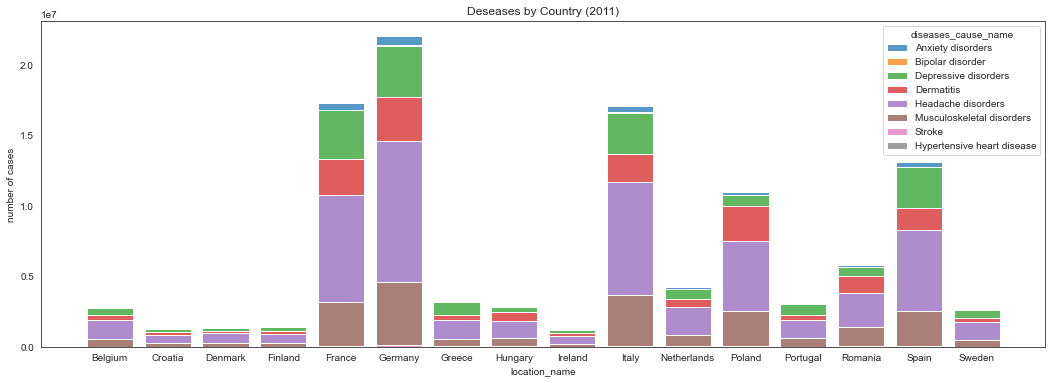

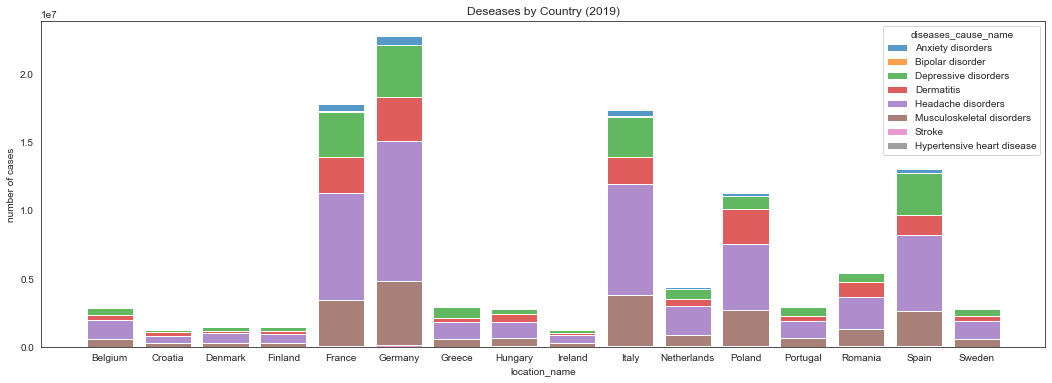

In [396]:
df_1 = df_diseases[df_diseases['year'] == 2011].sort_values(['location_name', 'diseases_cause_name'])
df_2 = df_diseases[df_diseases['year'] == 2019].sort_values(['location_name', 'diseases_cause_name'])

barplot_by_countries(df_1, x='location_name', h='diseases_cause_name', w='diseases_val', t='Deseases by Country (2011)', l = 'number of cases')
barplot_by_countries(df_2, x='location_name', h='diseases_cause_name', w='diseases_val', t='Deseases by Country (2019)', l = 'number of cases')


###  Employment

In [397]:
df_employment_raw = pd.read_excel('../raw data/Employment_WB/Employment_WB.xls',na_values='..')

In [398]:
df_employment_raw.head()

,Series Code,Country Name,Country Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,SL.AGR.EMPL.MA.ZS,Afghanistan,AFG,63.650002,64.019997,61.970001,61.150002,60.509998,59.299999,58.389999,...,50.200001,47.810001,45.880001,44.090000,42.299999,40.660000,38.360001,37.259998,36.599998,NaN
1,SL.AGR.EMPL.MA.ZS,Albania,ALB,44.919998,42.959999,41.700001,40.939999,39.779999,38.560001,37.430000,...,38.810001,37.590000,37.570000,36.759998,36.740002,36.290001,34.959999,33.720001,32.709999,NaN
2,SL.AGR.EMPL.MA.ZS,Algeria,DZA,23.709999,23.080000,23.219999,23.360001,21.809999,20.180000,18.709999,...,12.300000,12.290000,12.160000,11.950000,11.780000,11.560000,11.360000,11.050000,10.760000,NaN
3,SL.AGR.EMPL.MA.ZS,American Samoa,ASM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SL.AGR.EMPL.MA.ZS,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [399]:
#df = df_employment.copy()

def map_sector_name(row):
    sector_mapping = {
        "SL.AGR.EMPL.FE.ZS": "per_female_agriculture",
        "SL.AGR.EMPL.MA.ZS": "per_male_agriculture",
        "SL.AGR.EMPL.ZS": "per_total_agriculture",
        "SL.EMP.MPYR.FE.ZS": "per_female_employers",
        "SL.EMP.MPYR.MA.ZS": "per_male_employers",
        "SL.EMP.MPYR.ZS": "per_total_employers",
        "SL.IND.EMPL.FE.ZS": "per_female_industry",
        "SL.IND.EMPL.MA.ZS": "per_male_industry",
        "SL.IND.EMPL.ZS": "per_total_industry",
        "SL.SRV.EMPL.FE.ZS": "per_female_services",
        "SL.SRV.EMPL.MA.ZS": "per_male_industry",
        "SL.SRV.EMPL.ZS": "per_total_services"
    }
    return sector_mapping[row]

def clean_sector_name(row):
    col_name = (row
            .replace('per_female_', '')
            .replace('per_male_', '')
           )
        
    return f"employment_{col_name}"
    
def extract_gender(row):
    if 'per_female' in row:
        return 'Female'
    elif 'per_male' in row:
        return 'Male'
    else:
        return 'NOT_DEFINED'

    
def process_employment(df):
    
    df_res = pd.DataFrame();
    
    for year in years_list:
        #year = 2010
        #print(f"{year} [YR{year}]")
        col = f"{year} [YR{year}]"
        
        columns_to_keep = ['Series Code', 'Country Name', col]
        
        _df = df.copy()
        _df = _df[_df["Country Name"].isin(countries_list)][columns_to_keep]
        _df['employment_sector'] = _df['Series Code'].apply(map_sector_name)
        _df['employment_sector'] = _df['employment_sector'].apply(clean_sector_name)
        _df['year'] = year
        _df['val'] = _df[col]
    
        
        _df = _df[_df["year"].isin(years_list)]
        _df = _df[_df['employment_sector'].isin(['employment_agriculture', 'employment_industry', 'employment_services'])]
        
        df_res = pd.concat([df_res, _df], axis=0)

    
    df_res = (df_res[['Country Name', 'year', 'employment_sector', 'val']]
                    .rename(columns={'Country Name':'location_name', 
                                     'val': 'employment_val'
                                    })
                  )

    df_res['employment_val'] = df_res['employment_val'].fillna(0)
    df_res['employment_val'] = df_res['employment_val'].map(round)
    
    # group by to add Male + Female data
    df_res = (df_res
    .groupby(['location_name', 'year', 'employment_sector'])
    .aggregate({'employment_val': sum})
    .reset_index()
    )

    return df_res

df_employment = process_employment(df_employment_raw)
df_employment



,location_name,year,employment_sector,employment_val
0,Belgium,2010,employment_agriculture,3
1,Belgium,2010,employment_industry,108
2,Belgium,2010,employment_services,89
3,Belgium,2011,employment_agriculture,3
4,Belgium,2011,employment_industry,108
...,...,...,...,...
475,Sweden,2018,employment_industry,104
476,Sweden,2018,employment_services,92
477,Sweden,2019,employment_agriculture,4
478,Sweden,2019,employment_industry,105


In [400]:
print(df_employment.columns)
df_employment[(df_employment['location_name'] == 'Croatia') & (df_employment['year'] == 2010)]

Index(['location_name', 'year', 'employment_sector', 'employment_val'], dtype='object')


,location_name,year,employment_sector,employment_val
30,Croatia,2010,employment_agriculture,28
31,Croatia,2010,employment_industry,102
32,Croatia,2010,employment_services,70


In [401]:
df_employment.head()

,location_name,year,employment_sector,employment_val
0,Belgium,2010,employment_agriculture,3
1,Belgium,2010,employment_industry,108
2,Belgium,2010,employment_services,89
3,Belgium,2011,employment_agriculture,3
4,Belgium,2011,employment_industry,108


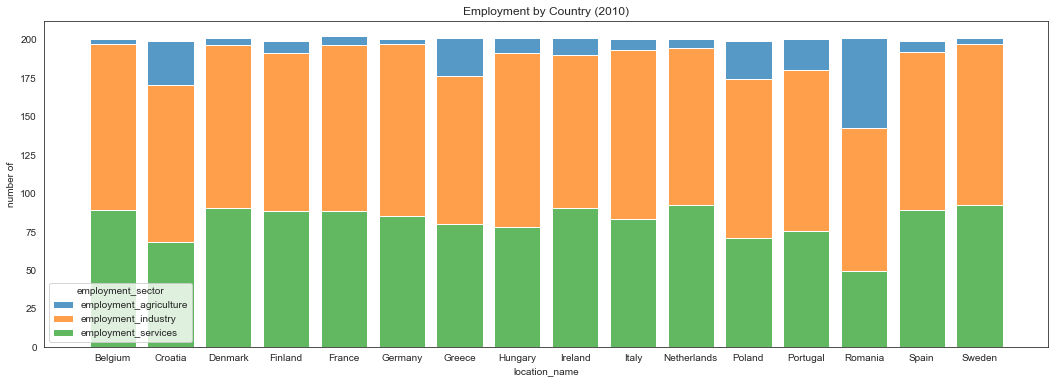

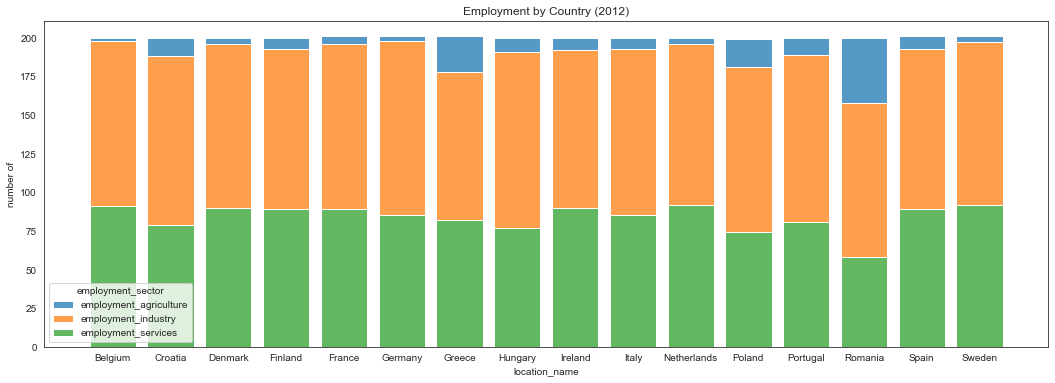

In [402]:

df_1 = df_employment[df_employment['year'] == 2011].sort_values(['location_name', 'employment_sector'])
df_2 = df_employment[df_employment['year'] == 2019].sort_values(['location_name', 'employment_sector'])

barplot_by_countries(df_1, x='location_name', h='employment_sector', w='employment_val', t='Employment by Country (2010)', l = 'number of')
barplot_by_countries(df_2, x='location_name', h='employment_sector', w='employment_val', t='Employment by Country (2012)', l = 'number of')


## Health Cost

In [403]:
df_health_cost_raw = pd.read_excel('../raw data/Health_expenditure_WB/Health_expenditure_WB.xls', na_values='..')

In [404]:
#  Categorical
print_categorical_indexes(df_health_cost_raw)

Categorical Unique Values
----------------------------------------
Series Name
['Domestic general government health expenditure per capita'
 'Domestic private health expenditure per capita']


----------------------------------------
Series Code
['SH.XPD.GHED.PP.CD' 'SH.XPD.PVTD.PP.CD']


----------------------------------------
Country Name
['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas, The' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'British Virgin Islands'
 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde'
 'Cambodia' 'Cameroon' 'Canada' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Channel Islands' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo, Dem. Rep.' 'Congo, Rep.' 'Costa Rica'
 "Cote d'Ivoire" 'Croatia' 'Cuba' 'Curacao' 'Cyprus' 

In [405]:
df_health_cost_raw.head()

,Series Name,Series Code,Country Name,Country Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,Domestic general government health expenditure...,SH.XPD.GHED.PP.CD,Afghanistan,AFG,NaN,NaN,0.693468,5.746409,4.740490,5.127724,...,7.678760,6.224039,8.151501,9.018871,9.891986,10.593705,11.627883,9.641537,NaN,NaN
1,Domestic general government health expenditure...,SH.XPD.GHED.PP.CD,Albania,ALB,105.441627,115.829979,117.793068,130.017593,149.126816,152.514328,...,239.541031,257.224182,271.678131,291.296295,317.450378,331.557312,344.465637,376.501373,NaN,NaN
2,Domestic general government health expenditure...,SH.XPD.GHED.PP.CD,Algeria,DZA,204.963440,248.090271,252.200760,267.399445,258.823029,247.080490,...,485.345856,590.011719,592.809387,675.426331,723.352844,672.498108,639.976257,633.798828,NaN,NaN
3,Domestic general government health expenditure...,SH.XPD.GHED.PP.CD,American Samoa,ASM,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Domestic general government health expenditure...,SH.XPD.GHED.PP.CD,Andorra,AND,1267.421753,1324.441040,1485.302856,1387.082886,1355.442261,1582.387573,...,1757.940308,1801.951050,1843.048828,1970.138794,2135.967285,2118.061523,2314.099365,2450.407959,NaN,NaN


In [406]:
def map_cost_type(row):
    sector_mapping = {
        "SH.XPD.GHED.PP.CD": "health_public_cost",
        "SH.XPD.PVTD.PP.CD": "health_private_cost"
    }
    return sector_mapping[row]

def process_health_cost(df):
    
    df_res = pd.DataFrame();
    
    for year in years_list:
        
        col = f"{year} [YR{year}]"
        columns_to_keep = ['Series Code', 'Country Name', col]
        
        _df = df.copy()
        _df = _df[_df["Country Name"].isin(countries_list)][columns_to_keep]
        _df['health_cost_type'] = _df['Series Code'].apply(map_cost_type)
        _df['year'] = year
        _df['val'] = _df[col]
        
        _df = _df[_df["year"].isin(years_list)]
        
        df_res = pd.concat([df_res, _df], axis=0)
        
    
    df_res = (df_res[['Country Name', 'year', 'health_cost_type', 'val']]
                    .rename(columns={'Country Name':'location_name', 'val': 'health_cost_val'})
                  )
    
    df_res['health_cost_val'] = df_res['health_cost_val'].fillna(0)
    df_res['health_cost_val'] = df_res['health_cost_val'].map(round)
    
    return df_res

df_health_cost = process_health_cost(df_health_cost_raw)

df_health_cost.head()

,location_name,year,health_cost_type,health_cost_val
18,Belgium,2010,health_public_cost,3118
48,Croatia,2010,health_public_cost,1333
53,Denmark,2010,health_public_cost,3738
67,Finland,2010,health_public_cost,2798
68,France,2010,health_public_cost,2862


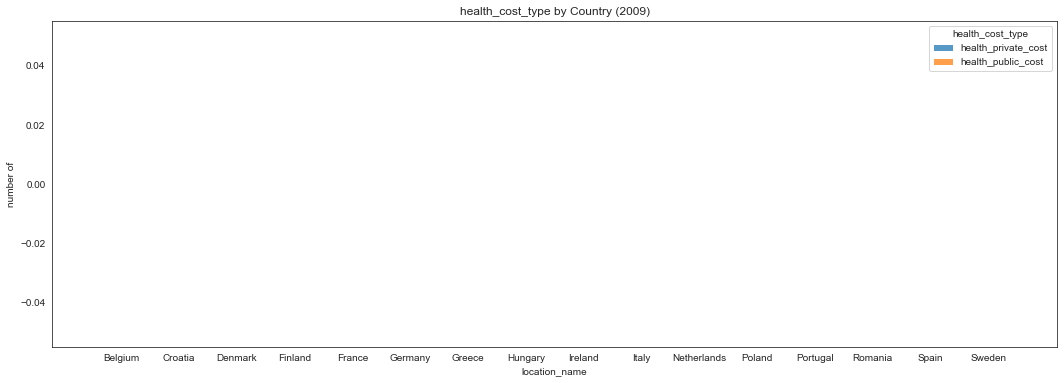

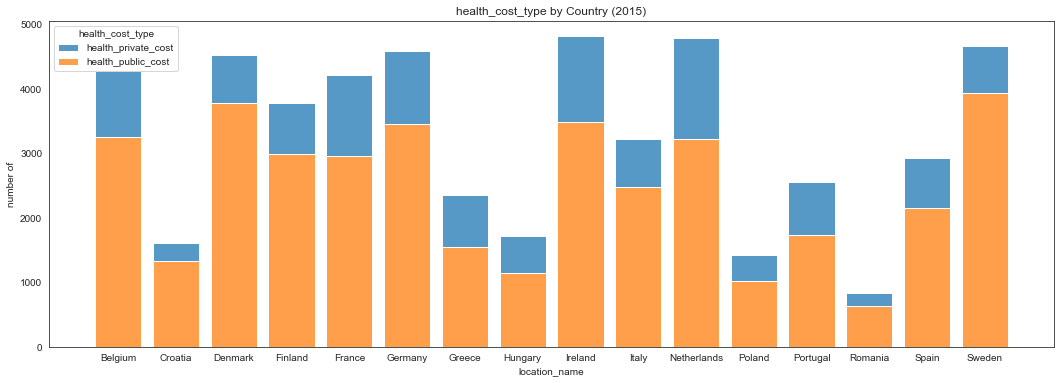

In [407]:
df_1 = df_health_cost[df_health_cost['year'] == 2011].sort_values(['location_name', 'health_cost_type'])
df_2 = df_health_cost[df_health_cost['year'] == 2019].sort_values(['location_name', 'health_cost_type'])

barplot_by_countries(df_2, x='location_name', h='health_cost_type', w='health_cost_val', t='health_cost_type by Country (2009)', l = 'number of')
barplot_by_countries(df_1, x='location_name', h='health_cost_type', w='health_cost_val', t='health_cost_type by Country (2015)', l = 'number of')


## LaborForceTotal_WB

In [408]:
df_labor_force_raw = pd.read_csv('../raw data/LaborForceTotal_WB/LaborForceTotal_WB.csv')

In [409]:
df_labor_force_raw.head()

,Series Name,Series Code,Country Name,Country Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
Labor force,total,SL.TLF.TOTL.IN,Afghanistan,AFG,5071018,5293408,5573458,5886907,6198355,6483460,...,7522643,7890946,8307845,8741746,9175691,9567304,9948739,10319282,10701549,10657679
Labor force,total,SL.TLF.TOTL.IN,Albania,ALB,1343716,1319777,1313099,1300292,1286492,1271829,...,1371813,1314035,1232509,1243921,1302893,1328845,1344945,1400072,1422089,1408795
Labor force,total,SL.TLF.TOTL.IN,Algeria,DZA,8879547,9106753,9327491,9544295,9764165,9985163,...,11295173,11532685,12003272,11584916,11878706,12178730,12464049,12589369,12716547,12231856
Labor force,total,SL.TLF.TOTL.IN,American Samoa,ASM,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
Labor force,total,SL.TLF.TOTL.IN,Andorra,AND,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..


In [410]:
#  Categorical
print_categorical_indexes(df_labor_force_raw)

Categorical Unique Values
----------------------------------------
Series Name
[' total' nan]


----------------------------------------
Series Code
['SL.TLF.TOTL.IN' nan]


----------------------------------------
Country Name
['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' nan 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium'
 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'British Virgin Islands' 'Brunei Darussalam'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon'
 'Canada' 'Cayman Islands' 'Central African Republic' 'Chad'
 'Channel Islands' 'Chile' 'China' 'Colombia' 'Comoros' 'Costa Rica'
 "Cote d'Ivoire" 'Croatia' 'Cuba' 'Curacao' 'Cyprus' 'Czech Republic'
 'Denmark' 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini'
 'Ethiopia' 'F

In [411]:
def map_indicator_name(row):
    sector_mapping = {
        "SL.TLF.TOTL.IN":"labor_force_total"
    }
    return sector_mapping[row]

def process_labor_force(df):
    
    df_res = pd.DataFrame();
    
    for year in years_list:
        
        col = f"{year} [YR{year}]"
        columns_to_keep = ['Series Code', 'Country Name', col]
        
        _df = df.copy()
        _df = _df[_df["Country Name"].isin(countries_list)][columns_to_keep]
        _df['labor_force_total'] = _df['Series Code'].apply(map_indicator_name)
        
        _df['year'] = year
        _df['val'] = _df[col].astype(int)
        
        _df = _df[_df["year"].isin(years_list)]
        
        df_res = pd.concat([df_res, _df], axis=0)
        
    
    df_res = (df_res[['Country Name', 'year', 'labor_force_total', 'val']]
                    .rename(columns={'Country Name':'location_name','val':  'labor_force_val'})
                  )
    
    df_res['labor_force_val'] = df_res['labor_force_val'].fillna(0)
    df_res['labor_force_val'] = df_res['labor_force_val'].map(round)

    return (df_res
                .reset_index()
                .drop('index', axis = 1)
           )

df_labor_force = process_labor_force(df_labor_force_raw)

df_labor_force.head()

,location_name,year,labor_force_total,labor_force_val
0,Belgium,2010,labor_force_total,4887584
1,Croatia,2010,labor_force_total,1913390
2,Denmark,2010,labor_force_total,2890450
3,Finland,2010,labor_force_total,2679149
4,France,2010,labor_force_total,29744936


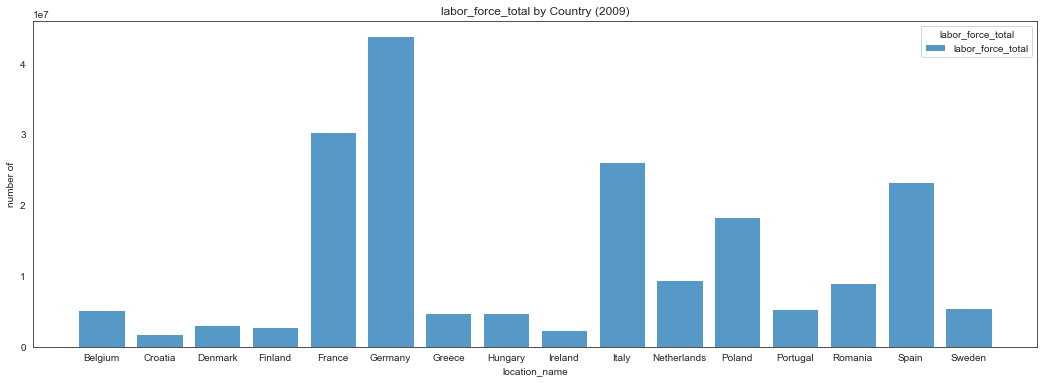

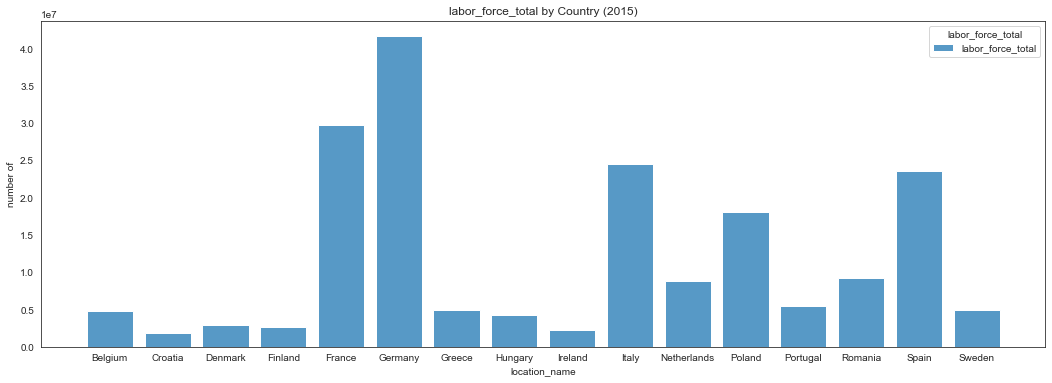

In [422]:
df_1 = df_labor_force[df_labor_force['year'] == 2011].sort_values(['location_name', 'labor_force_total'])
df_2 = df_labor_force[df_labor_force['year'] == 2019].sort_values(['location_name', 'labor_force_total'])

barplot_by_countries(df_2, x='location_name', h='labor_force_total', w='labor_force_val', t='labor_force_total by Country (2009)', l = 'number of')
barplot_by_countries(df_1, x='location_name', h='labor_force_total', w='labor_force_val', t='labor_force_total by Country (2015)', l = 'number of')


### MERGE AND TEST

In [413]:
df_diseases.head()

,location_name,diseases_cause_name,diseases_val,year
58176,Poland,Musculoskeletal disorders,2459777,2010
58212,Romania,Depressive disorders,641575,2010
58218,Romania,Bipolar disorder,10640,2010
58224,Romania,Anxiety disorders,103911,2010
58781,Belgium,Dermatitis,350210,2010


In [414]:
print(df_employment.columns)
df_employment.head()

Index(['location_name', 'year', 'employment_sector', 'employment_val'], dtype='object')


,location_name,year,employment_sector,employment_val
0,Belgium,2010,employment_agriculture,3
1,Belgium,2010,employment_industry,108
2,Belgium,2010,employment_services,89
3,Belgium,2011,employment_agriculture,3
4,Belgium,2011,employment_industry,108


In [415]:
print(df_health_cost.columns)
df_health_cost.head()

Index(['location_name', 'year', 'health_cost_type', 'health_cost_val'], dtype='object')


,location_name,year,health_cost_type,health_cost_val
18,Belgium,2010,health_public_cost,3118
48,Croatia,2010,health_public_cost,1333
53,Denmark,2010,health_public_cost,3738
67,Finland,2010,health_public_cost,2798
68,France,2010,health_public_cost,2862


In [416]:
df_labor_force.head()

,location_name,year,labor_force_total,labor_force_val
0,Belgium,2010,labor_force_total,4887584
1,Croatia,2010,labor_force_total,1913390
2,Denmark,2010,labor_force_total,2890450
3,Finland,2010,labor_force_total,2679149
4,France,2010,labor_force_total,29744936


In [417]:
def subset_and_unstack_by_year(df, year, x, y, z):
    return (df[df['year'] == year]
            .drop('year', axis = 1)
            .set_index([x, y])[z]
            .unstack()
            .fillna(0).astype(int)
            .reset_index()
            .set_index(x)
           )
    
def merge_by_year(year):
    _df_deseases = subset_and_unstack_by_year(df_diseases, year, 'location_name','diseases_cause_name', 'diseases_val')
    _df_employment = subset_and_unstack_by_year(df_employment, year, 'location_name','employment_sector', 'employment_val')
    _df_health_cost = subset_and_unstack_by_year(df_health_cost, year, 'location_name','health_cost_type', 'health_cost_val')
    _df_labor_force = subset_and_unstack_by_year(df_labor_force, year, 'location_name', 'labor_force_total', 'labor_force_val')
    
    
    df_merged = pd.concat([_df_deseases, _df_employment, _df_health_cost, _df_labor_force], axis = 1)
    
    return df_merged

df_all = merge_by_year(2015)
df_all.head()

,Anxiety disorders,Bipolar disorder,Depressive disorders,Dermatitis,Headache disorders,Hypertensive heart disease,Musculoskeletal disorders,Stroke,employment_agriculture,employment_industry,employment_services,health_private_cost,health_public_cost,labor_force_total
location_name,,,,,,,,,,,,,,
Belgium,78423,6787,512430,358533,1362715,0,565004,14942,3,107,91,1173,3662,5001378
Croatia,22700,1873,173286,254480,509544,0,281312,10826,18,105,78,263,1291,1887425
Denmark,38619,3579,252708,156873,687798,0,277321,7529,5,106,89,797,4241,2888656
Finland,32281,3313,268433,172817,659300,0,274596,10047,8,103,89,879,3220,2695567
France,507689,40061,3205821,2598759,7708158,0,3179745,75569,6,105,89,1295,3396,30155958


In [418]:
df_all.columns

Index(['Anxiety disorders', 'Bipolar disorder', 'Depressive disorders',
       'Dermatitis', 'Headache disorders', 'Hypertensive heart disease',
       'Musculoskeletal disorders', 'Stroke', 'employment_agriculture',
       'employment_industry', 'employment_services', 'health_private_cost',
       'health_public_cost', 'labor_force_total'],
      dtype='object')

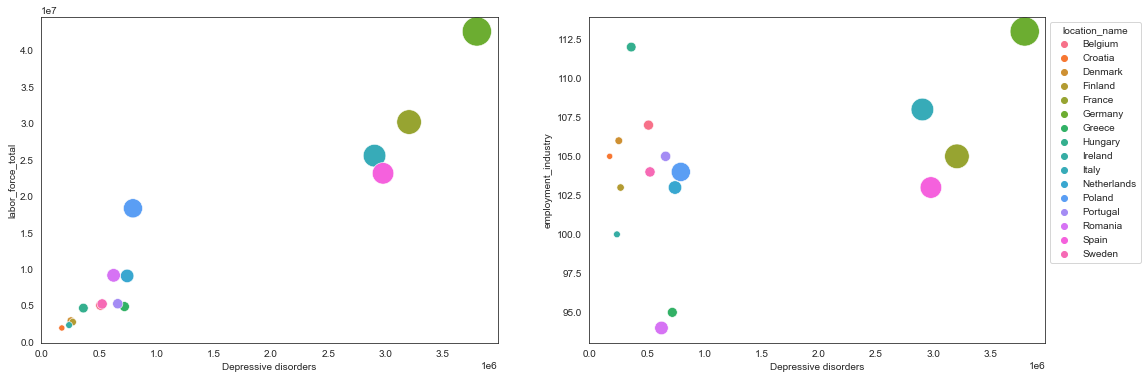

In [419]:
fig, axes = plt.subplots(1, 2, sharex=False, figsize=(18, 1 * 6))
sns.scatterplot(ax=axes[0], data=df_all, x='Depressive disorders', y='labor_force_total', s = df_all['labor_force_total'] / 50000, hue='location_name')
sns.scatterplot(ax=axes[1], data=df_all, x='Depressive disorders', y='employment_industry', s = df_all['labor_force_total'] / 50000, hue='location_name')
axes[0].get_legend().remove()
axes[1].get_legend().set_bbox_to_anchor((1, 1))
plt.show()

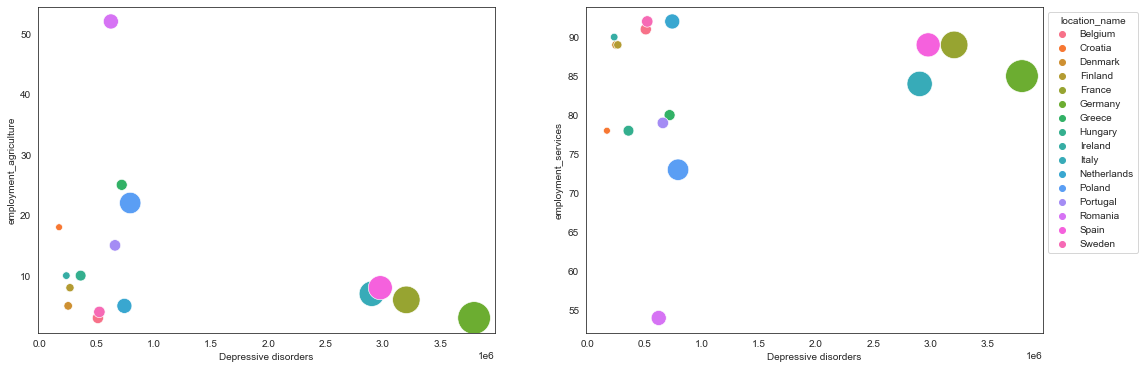

In [420]:
fig, axes = plt.subplots(1, 2, sharex=False, figsize=(18, 1 * 6))
sns.scatterplot(ax=axes[0], data=df_all, x='Depressive disorders', y='employment_agriculture', s = df_all['labor_force_total'] / 40000, hue='location_name')
sns.scatterplot(ax=axes[1], data=df_all, x='Depressive disorders', y='employment_services', s = df_all['labor_force_total'] / 40000, hue='location_name')
axes[0].get_legend().remove()
axes[1].get_legend().set_bbox_to_anchor((1, 1))
plt.show()

In [421]:
df_france =  merge_by_year(2015).reset_index()
df_france = df_france[df_france["location_name"] == 'France']
df_france.head()

,location_name,Anxiety disorders,Bipolar disorder,Depressive disorders,Dermatitis,Headache disorders,Hypertensive heart disease,Musculoskeletal disorders,Stroke,employment_agriculture,employment_industry,employment_services,health_private_cost,health_public_cost,labor_force_total
4,France,507689,40061,3205821,2598759,7708158,0,3179745,75569,6,105,89,1295,3396,30155958
